# PEC: Bitcoin y Etherium

## Carga de los datasets

En primer lugar, cargamos las librerías y los datasets correspondientes a la cotización de los últimos seis meses de las criptomonedas bitcoin y ether. Hemos examinado los datasets y hemos comprobado que no hayan missing values y la separación de los datos.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
bitcoin = pd.read_csv('bitflyerJPY_1-min_data_2017-07-04_to_2018-01-08.csv', sep = ',')
etherium = pd.read_csv('export-EtherPrice.csv', sep=',')


Aquí mostramos las cabeceras y colas con sus cinco primeras y últimas filas de los respectivos datasets.
Como categorías en el dataset de la cotización del ether tenemos la fecha en formato (mm/dd/yyyy) y Unix time stamp,  y su respectiva cotización en el momento.
En el caso del dataset de la cotización del bitcoin tenemos la fecha en formato Unix time stamp, el cotizaciones de apertura, máximo, mínimo y cierre del momento, el volumen de bitcoins, el volumen de fracciones de bitcoin y el precio que tienen en el mercado.
Como podremos observar, hay mucha diferencia entre el número de categorías del dataset del ether con respecto al de bitcoin, por lo que el número del primero condicionará el estudio.

In [5]:
etherium.head()

,Date(UTC),UnixTimeStamp,Value
0,7/4/2017,1499126400,269.05
1,7/5/2017,1499212800,266.00
2,7/6/2017,1499299200,265.88
3,7/7/2017,1499385600,240.94
4,7/8/2017,1499472000,245.67


In [6]:
etherium.tail()

,Date(UTC),UnixTimeStamp,Value
181,1/4/2018,1515024000,944.83
182,1/5/2018,1515110400,967.13
183,1/6/2018,1515196800,1006.41
184,1/7/2018,1515283200,1117.75
185,1/8/2018,1515369600,1136.11


In [7]:
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1499155260,296127,296558,296016,296540,1.158600,3.432441e+05,296257.67168
1,1499155320,296539,296769,296060,296679,11.115510,3.295332e+06,296462.51372
2,1499155380,296060,296090,296060,296060,5.527494,1.636491e+06,296063.83615
3,1499155440,296060,296260,296015,296015,8.414064,2.491620e+06,296125.66780
4,1499155500,296361,296540,296155,296155,3.993010,1.183292e+06,296340.78573


In [8]:
bitcoin.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
266770,1515369360,1944024,1944664,1941113,1941670,4.964308,9.645226e+06,1.942915e+06
266771,1515369420,1941670,1942000,1941000,1941113,3.153995,6.124083e+06,1.941691e+06
266772,1515369480,1941725,1943200,1941113,1943200,2.213478,4.299943e+06,1.942618e+06
266773,1515369540,1943200,1944975,1942000,1944975,14.356733,2.790039e+07,1.943366e+06
266774,1515369600,1945050,1945200,1942975,1944000,9.499370,1.847038e+07,1.944380e+06


## Tratamiento de los datasets

Ahora procedemos al tratamiento de los datos temporales para poderlos representar gráficamente, primero convertimos el formato unix timestamp a datetime y luego homogeneizamos a un solo dato diario en vez de varios como es el caso del dataset de bitcoin:

In [9]:
bitcoin.Timestamp = pd.to_datetime(bitcoin.Timestamp, unit='s')
etherium.UnixTimeStamp = pd.to_datetime(etherium.UnixTimeStamp, unit='s')

In [10]:
bitcoin.index = bitcoin.Timestamp

In [11]:
bitcoin = bitcoin.resample('D').mean()
bitcoin_month = bitcoin.resample('M').mean()
bitcoin_year = bitcoin.resample('A-DEC').mean()

De la siguiente manera quedan las cabeceras y las colas de los datasets:

A) Bitcoin:

In [12]:
bitcoin.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-07-04,292200.107404,292317.351408,292049.884254,292186.096976,6.844604,2.000919e+06,292177.556681
2017-07-05,290574.565972,290665.434722,290465.238889,290564.653472,6.590554,1.913997e+06,290562.675337
2017-07-06,293191.115972,293264.783333,293108.535417,293180.833333,5.336428,1.564498e+06,293182.524481
2017-07-07,289703.554167,289802.754167,289580.273611,289680.159722,6.300531,1.825164e+06,289683.612931
2017-07-08,289184.677083,289272.347222,289090.317361,289173.889583,4.103111,1.185215e+06,289174.397839


In [13]:
bitcoin.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-01-04,1.795203e+06,1.796554e+06,1.793848e+06,1.795265e+06,9.553181,1.717916e+07,1.795208e+06
2018-01-05,1.912410e+06,1.914067e+06,1.910917e+06,1.912514e+06,15.354395,2.943427e+07,1.912520e+06
2018-01-06,1.963351e+06,1.964521e+06,1.962173e+06,1.963351e+06,5.566129,1.092058e+07,1.963315e+06
2018-01-07,1.968395e+06,1.969510e+06,1.967284e+06,1.968421e+06,3.969752,7.809143e+06,1.968303e+06
2018-01-08,1.945050e+06,1.945200e+06,1.942975e+06,1.944000e+06,9.499370,1.847038e+07,1.944380e+06


B) Ethereum:

In [14]:
etherium.head()

,Date(UTC),UnixTimeStamp,Value
0,7/4/2017,2017-07-04,269.05
1,7/5/2017,2017-07-05,266.00
2,7/6/2017,2017-07-06,265.88
3,7/7/2017,2017-07-07,240.94
4,7/8/2017,2017-07-08,245.67


In [15]:
etherium.tail()

,Date(UTC),UnixTimeStamp,Value
181,1/4/2018,2018-01-04,944.83
182,1/5/2018,2018-01-05,967.13
183,1/6/2018,2018-01-06,1006.41
184,1/7/2018,2018-01-07,1117.75
185,1/8/2018,2018-01-08,1136.11


In [16]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Media de cambio del bitcoin con respecto al dólar', fontsize=22)

In [17]:
plt.subplot(221)
plt.plot(bitcoin.Weighted_Price, '-', label='Por días')
plt.legend()

In [18]:
plt.subplot(222)
plt.plot(bitcoin_month.Weighted_Price, '-', label='Por meses')
plt.legend()

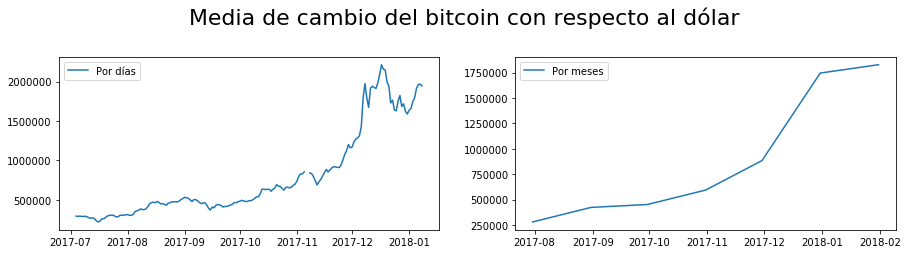

In [19]:
plt.show()

B) Ether:

In [20]:
etherium.index = etherium.UnixTimeStamp

In [21]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Media de cambio del ether con respecto al dólar', fontsize=22)

In [22]:
etherium = etherium.resample('D').mean()

In [23]:
etherium_month = etherium.resample('M').mean()
etherium_year = etherium.resample('A-DEC').mean()

In [24]:
plt.subplot(221)
plt.plot(etherium.Value, '-', label='Por días')
plt.legend()

In [25]:
plt.subplot(222)
plt.plot(etherium_month.Value, '-', label='Por meses')
plt.legend()

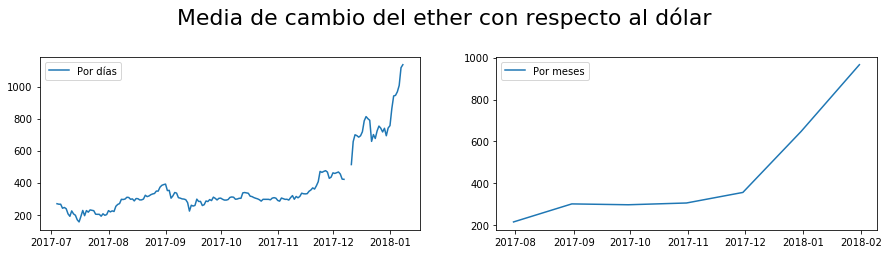

In [26]:
plt.show()

## Análisis estadístico comparativo

Después de haber visto que la cotización de bitcoin ha frenado su apreciación y que la del ether continúa su ascenso, le añadimos al dataset de la cotización del ether, la columna correspondiente a la del bitcoin para poder compararlas en un mismo dataset pasaremos a ver los principales parámetros estadísticos:

In [27]:
etherium["Weighted_Price"] = bitcoin.Weighted_Price
etherVSbitcoin = etherium
etherVSbitcoin.head()

,Value,Weighted_Price
UnixTimeStamp,,
2017-07-04,269.05,292177.556681
2017-07-05,266.00,290562.675337
2017-07-06,265.88,293182.524481
2017-07-07,240.94,289683.612931
2017-07-08,245.67,289174.397839


In [28]:
etherVSbitcoin.tail()

,Value,Weighted_Price
UnixTimeStamp,,
2018-01-04,944.83,1.795208e+06
2018-01-05,967.13,1.912520e+06
2018-01-06,1006.41,1.963315e+06
2018-01-07,1117.75,1.968303e+06
2018-01-08,1136.11,1.944380e+06


In [29]:
etherVSbitcoin['Weighted_Price'].describe()

count    1.870000e+02
mean     7.835245e+05
std      5.512872e+05
min      2.193434e+05
25%      4.209025e+05
50%      5.154994e+05
75%      9.148580e+05
max      2.214359e+06
Name: Weighted_Price, dtype: float64

In [30]:
etherVSbitcoin['Value'].describe()

count     186.000000
mean      377.774194
std       193.217538
min       155.420000
25%       285.487500
50%       303.870000
75%       383.105000
max      1136.110000
Name: Value, dtype: float64

Ahora pasamos a hacer una tabla comparativa porcentual entre unos valores y otros:

In [31]:
etherVSbitcoin["Compare"]=((etherVSbitcoin['Value']*100)/etherVSbitcoin['Weighted_Price'])

In [32]:
etherVSbitcoin.head()

,Value,Weighted_Price,Compare
UnixTimeStamp,,,
2017-07-04,269.05,292177.556681,0.092084
2017-07-05,266.00,290562.675337,0.091547
2017-07-06,265.88,293182.524481,0.090688
2017-07-07,240.94,289683.612931,0.083174
2017-07-08,245.67,289174.397839,0.084956


Como podemos comprobar, etherium ha tenido poco crecimiento frente a bitcoin siendo así que, en proporción:

In [33]:
Incremento = etherVSbitcoin["Compare"].mean()
print('El crecimiento promedio de etherium en comparación con bitcoin ha sido del:', Incremento)

El crecimiento promedio de etherium en comparación con bitcoin ha sido del: 0.057325523042895996


En el siguiente gráfico veremos representados mediante diagrama de cajas que en el caso de bitcoin tuvo los siguientes cuartiles:
Q1 = 420902.5; Q2 = 515499.4; Q3 = 914858.0

Y en el caso del ether:
Q1 = 285.5; Q2 = 303.9; Q3 = 383.1

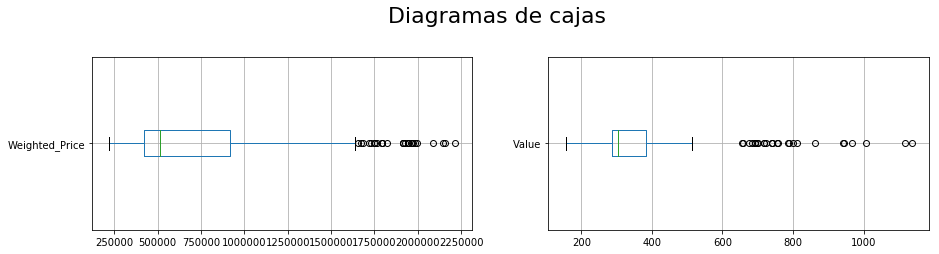

In [34]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Diagramas de cajas', fontsize=22)
plt.subplot(221)
etherVSbitcoin.boxplot(['Weighted_Price'], vert=False)
plt.subplot(222)
etherVSbitcoin.boxplot(['Value'], vert=False)
plt.show()

## Conclusión final

Por lo que podemos concluir que aunque el crecimiento promedio de etherium es menor en comparación con bitcoin, su fluctuación ha sido menor y al menos durante el último mes muestra una tendencia más alcista que la de bitcoin que parece que  su crecimiento se ha visto frenado.